In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [2]:
# File name
file = 'new_private_cars.csv'

# Load dataset with error handling
try:
    uncleaned_cars_data = pd.read_csv(file)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(e)

File loaded successfully.


In [3]:
# Basic statistical description of the dataset using describe
basic_stats_desc = uncleaned_cars_data.describe()

# Calculating additional statistical moments: skewness and kurtosis
skewness = uncleaned_cars_data.skew(numeric_only=True)
kurt = uncleaned_cars_data.kurtosis(numeric_only=True)

# Correlation matrix for numerical columns
correlation_matrix = uncleaned_cars_data.corr(numeric_only=True)

# Combine all results into a summary
Summary_results = {
    'Mean': uncleaned_cars_data.mean(numeric_only=True),
    'Median': uncleaned_cars_data.median(numeric_only=True),
    'Std Dev': uncleaned_cars_data.std(numeric_only=True),
    'Skewness': skewness,
    'Kurtosis': kurt
}

# Convert summary into a DataFrame for better visualization
Summary_results_df = pd.DataFrame(Summary_results)

# Display the results
print("Basic Statistical Description:")
print(basic_stats_desc)

print("\nStatistical Brief (Mean, Median, Std Dev, Skewness, Kurtosis):")
print(Summary_results_df)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Basic Statistical Description:
           TLIST(M1)         VALUE
count   29808.000000  25989.000000
mean   202249.760870    200.773866
std       109.390688    961.631887
min    202101.000000      0.000000
25%    202112.000000      6.000000
50%    202211.500000     27.000000
75%    202311.000000     94.000000
max    202410.000000  25822.000000

Statistical Brief (Mean, Median, Std Dev, Skewness, Kurtosis):
                    Mean    Median     Std Dev   Skewness    Kurtosis
TLIST(M1)  202249.760870  202211.5  109.390688   0.061361   -1.308974
VALUE         200.773866      27.0  961.631887  13.126228  229.269699

Correlation Matrix:
           TLIST(M1)     VALUE
TLIST(M1)   1.000000  0.015386
VALUE       0.015386  1.000000


In [4]:
# Data info
uncleaned_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29808 entries, 0 to 29807
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATISTIC            29808 non-null  object 
 1   Statistic Label      29808 non-null  object 
 2   TLIST(M1)            29808 non-null  int64  
 3   Month                29808 non-null  object 
 4   C01835V02260         29808 non-null  object 
 5   Licensing Authority  29808 non-null  object 
 6   C01841V02268         29808 non-null  object 
 7   Type of Fuel         29808 non-null  object 
 8   UNIT                 29808 non-null  object 
 9   VALUE                25989 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 2.3+ MB


In [5]:
#Finding missing data
uncleaned_cars_data.isnull().sum()

STATISTIC                 0
Statistic Label           0
TLIST(M1)                 0
Month                     0
C01835V02260              0
Licensing Authority       0
C01841V02268              0
Type of Fuel              0
UNIT                      0
VALUE                  3819
dtype: int64

In [6]:
# Data cleaning and preprocessing
print("Starting data cleaning process...")
uncleaned_cars_data['Month'] = pd.to_datetime(uncleaned_cars_data['Month'], format='%Y %B', errors='coerce')
cars_data = uncleaned_cars_data.dropna(subset=['VALUE', 'Month'])
print(f"Data cleaned. {len(uncleaned_cars_data) - len(cars_data)} rows with missing or invalid data removed.")

Starting data cleaning process...
Data cleaned. 3819 rows with missing or invalid data removed.


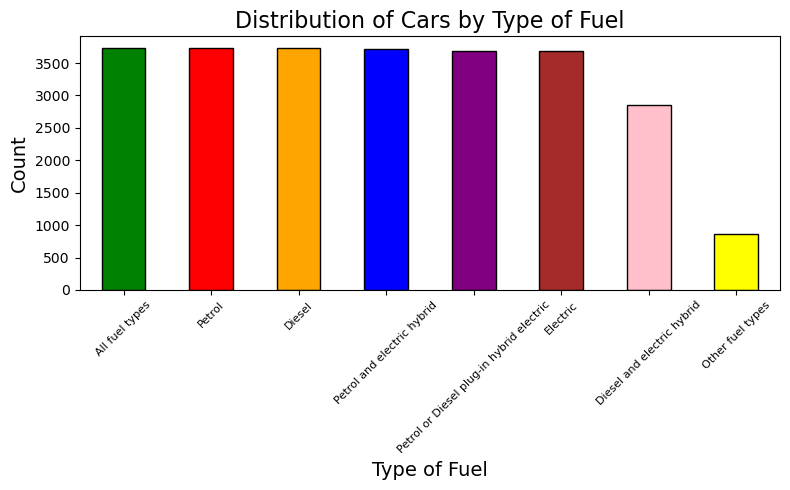

In [7]:
# Visualization - Distribution of Fuel Type

def fuel_type_plot():
    """
    Creates a bar plot showing the distribution of cars by type of fuel.
    """
    plt.figure(figsize=(8, 5))
    fuel_counts = cars_data['Type of Fuel'].value_counts()
    color = ['green','red','orange','blue','purple','brown','pink','yellow']
    fuel_counts.plot(kind='bar', color=color, edgecolor='black')
    plt.title('Distribution of Cars by Type of Fuel', fontsize=16)
    plt.xlabel('Type of Fuel', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

fuel_type_plot()

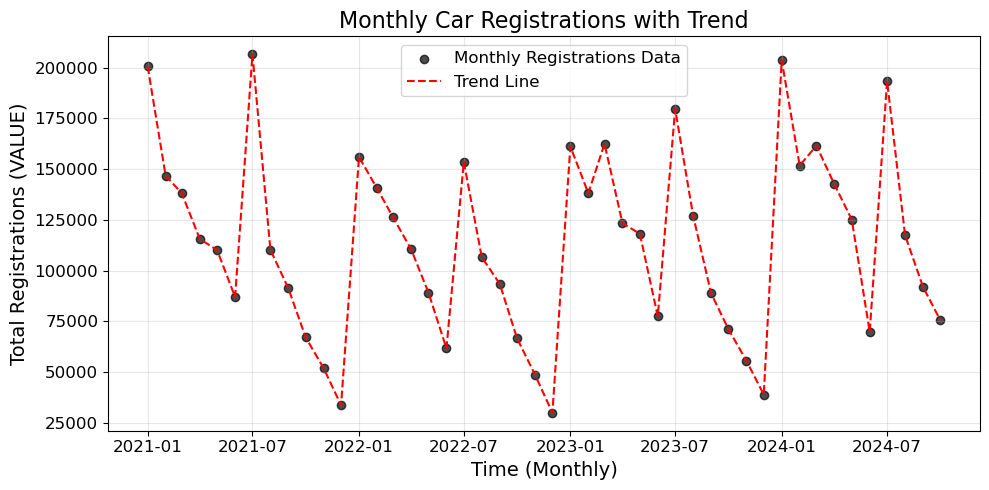

In [15]:
# Scatter and line plot for VALUE over time
def monthly_car_registrations_plot():
    """
    Creates a scatter plot with a trend line showing monthly car registrations over time.
    """
    monthly_registrations = cars_data.groupby('Month')['VALUE'].sum()
    
    plt.figure(figsize=(10,5))

    #scatter plot
    plt.scatter(monthly_registrations.index, monthly_registrations.values, color='black', alpha=0.7, label='Monthly Registrations Data')

    #Trend line
    plt.plot(monthly_registrations.index, monthly_registrations.values, color='red', linestyle='--', linewidth=1.5, label='Trend Line')

    #Plot enhancements
    plt.title('Monthly Car Registrations with Trend', fontsize=16)
    plt.xlabel('Time (Monthly)', fontsize=14)
    plt.ylabel('Total Registrations (VALUE)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
monthly_car_registrations_plot()

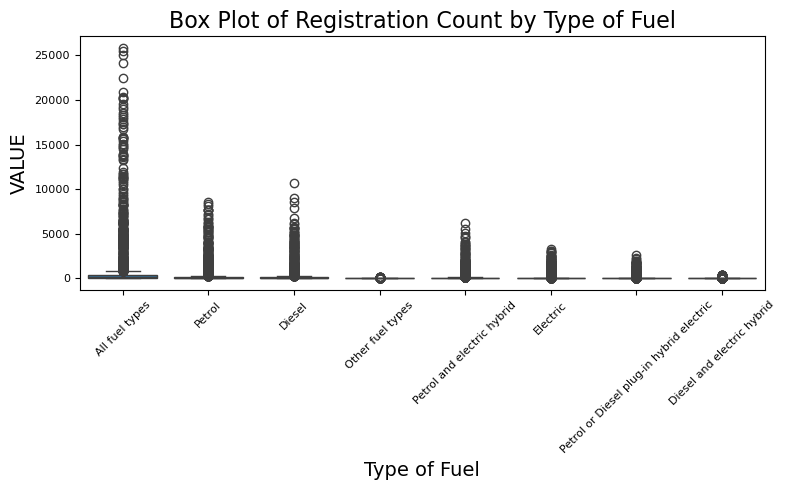

In [17]:
# Box plot for VALUE by Type of Fuel
def plot_registration_count_by_fuel_type():
    """
    Creates a box plot of the VALUE column grouped by the Type of Fuel.
    """
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Type of Fuel', y='VALUE', data=cars_data)
    plt.title('Box Plot of Registration Count by Type of Fuel', fontsize=16)
    plt.xlabel('Type of Fuel', fontsize=14)
    plt.ylabel('VALUE', fontsize=14)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

plot_registration_count_by_fuel_type()

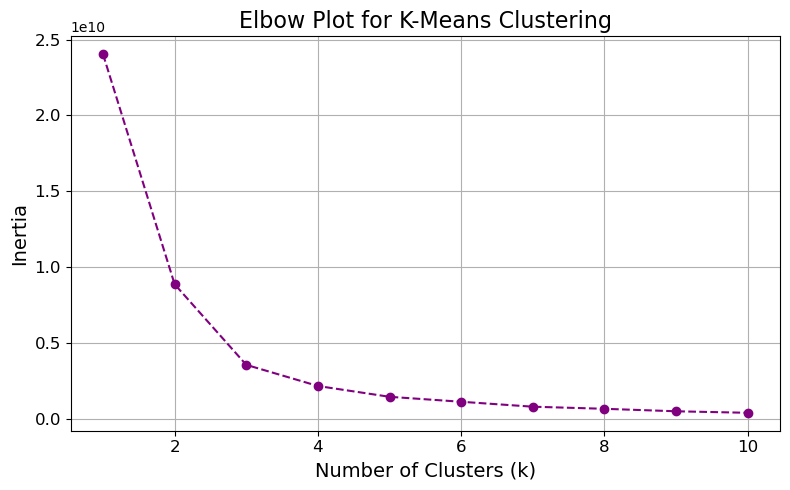

In [18]:
# Elbow Plot for K-Means Clustering
def clustering_elbow_plot():
    """
    Creates an elbow plot to determine the optimal number of clusters for K-Means clustering.
    """
    clustered_cars_data = cars_data.copy()
    clustered_cars_data['Type of Fuel'] = LabelEncoder().fit_transform(cars_data['Type of Fuel'])
    features = clustered_cars_data[['VALUE', 'Type of Fuel']].dropna()

    k_values = range(1, 11)
    clustering_tightness = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        clustering_tightness.append(kmeans.inertia_)

    plt.figure(figsize=(8,5))
    plt.plot(k_values, clustering_tightness, marker='o', linestyle='--', color='purple')
    plt.title('Elbow Plot for K-Means Clustering', fontsize=16)
    plt.xlabel('Number of Clusters (k)', fontsize=14)
    plt.ylabel('Inertia', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

clustering_elbow_plot()

K-Means clustering completed. Cluster centers: [[1.04730954e+02 3.51868373e+00]
 [1.59811852e+04 1.85185185e-02]
 [4.43999735e+03 2.05555556e+00]]


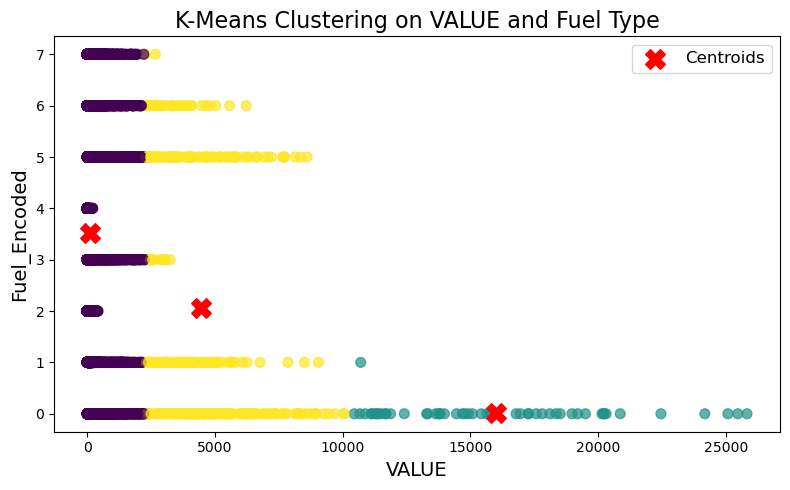

In [20]:
# K-Means Clustering and Visualization
cars_data['Fuel_Encoded'] = LabelEncoder().fit_transform(cars_data['Type of Fuel'])
X_clustering = cars_data[['VALUE', 'Fuel_Encoded']].values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_clustering)

print(f'K-Means clustering completed. Cluster centers: {kmeans.cluster_centers_}')

def kmeans_clustering_plot():
    """
    Creates a scatter plot to visualize the K-Means clustering results.
    """
    plt.figure(figsize=(8,5))

    #scatter plot
    plt.scatter(X_clustering[:, 0], X_clustering[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

    #plot enhancements
    plt.title('K-Means Clustering on VALUE and Fuel Type', fontsize=16)
    plt.xlabel('VALUE', fontsize=14)
    plt.ylabel('Fuel_Encoded', fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

kmeans_clustering_plot()

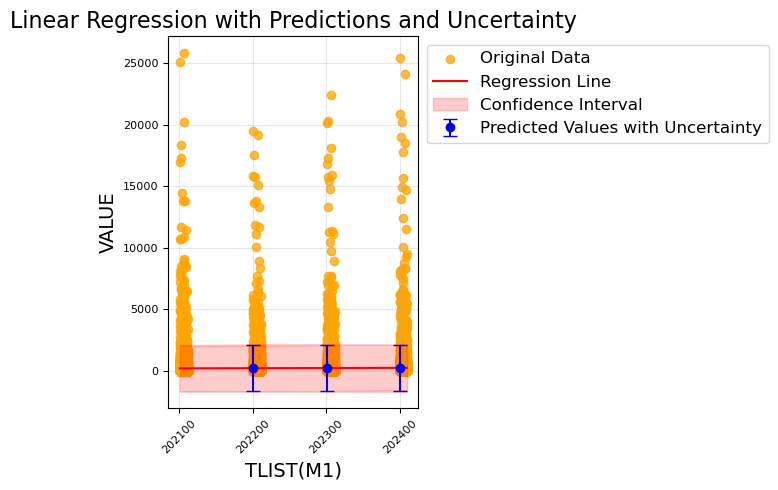

Predicted values for new inputs: [194.40778314 207.95576779 221.50375244]
Uncertainty for new predictions: 1884.5391221699704


In [152]:
def linear_regression_with_uncertainty(data, feature_column, target_column, new_values):
    """
    Fits a linear regression model, plots the regression line with a confidence interval,
    and includes predictions for new values along with uncertainty.

    Args:
        data (DataFrame): The dataset containing the feature and target columns.
        feature_column (str): The name of the feature (independent variable) column.
        target_column (str): The name of the target (dependent variable) column.
        new_values (list): A list of new feature values for which predictions will be made.

    Returns:
        tuple: Predicted values for new inputs and the associated uncertainty.
    """
    # Extract the feature (X) and target (y) from the dataset
    X = data[[feature_column]].values  # Feature values (independent variable)
    y = data[target_column].values  # Target values (dependent variable)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)  # Predicted values for the training data

    # Calculate residuals and standard error
    residuals = y - y_pred
    std_error = np.std(residuals)
    confidence_interval = 1.96 * std_error  # 95% confidence interval for the regression line

    # Prepare new values for prediction (ensure they are in the correct shape)
    new_values_array = np.array(new_values).reshape(-1, 1)
    predicted_new_values = model.predict(new_values_array)  # Predictions for the new feature values
    uncertainty = 1.96 * std_error  # Uncertainty for new predictions (same as for regression line)

    # Plotting the results
    plt.figure(figsize=(7,5))

    # Plot the original data points
    plt.scatter(X, y, alpha=0.75, label='Original Data', color='orange')

    # Plot the regression line
    plt.plot(X, y_pred, color='red', label='Regression Line')

    # Plot the confidence interval as a shaded region
    plt.fill_between(X.flatten(), y_pred - confidence_interval, y_pred + confidence_interval,
                     color='red', alpha=0.2, label='Confidence Interval')

    # Plot the predicted new values with error bars
    plt.errorbar(new_values_array.flatten(), predicted_new_values, yerr=uncertainty, fmt='o', capsize=5,
                 color='blue', label='Predicted Values with Uncertainty')

    # Title and labels
    plt.title('Linear Regression with Predictions and Uncertainty', fontsize=16)
    plt.xlabel(feature_column, fontsize=14)
    plt.ylabel(target_column, fontsize=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Return the predictions and associated uncertainty for the new values
    return predicted_new_values, uncertainty

# Example usage
new_predictions, prediction_uncertainty = linear_regression_with_uncertainty(
    cars_data,  # The dataset containing the data
    feature_column='TLIST(M1)',  # Feature for prediction (e.g., car model year)
    target_column='VALUE',  # Target we want to predict (e.g., car registrations count)
    new_values=[202201, 202301, 202401]  # New feature values (e.g., new car model years)
)

# Print the predicted values and their uncertainty
print("Predicted values for new inputs:", new_predictions)
print("Uncertainty for new predictions:", prediction_uncertainty)